<a href="https://colab.research.google.com/gist/Eeman1113/2ca4d37d8bdf14b9933ae7b9a0ad1c8e/ai_to_create_my_spotify_playlist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Better song recommendation system than spotify
!pip install Spotipy

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util


cid ='cid' # Client ID; copy this from your app created on beta.developer.spotify.com
secret = 'secret' # Client Secret; copy this from your app
username = 'username' # Your Spotify username

#for avaliable scopes see https://developer.spotify.com/web-api/using-scopes/
scope = 'user-library-read playlist-modify-public playlist-read-private'

redirect_uri='https://developer.spotify.com/dashboard/applications/684911c43f9b4abb91a6e7e36489815f'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username,scope,client_id=cid,client_secret=secret,redirect_uri="https://developer.spotify.com/dashboard/applications/684911c43f9b4abb91a6e7e36489815f")

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [ ]:
#Create a dataframe of your playlist including tracks' names and audio features
import pandas as pd

sourcePlaylistID = 'https://open.spotify.com/playlist/21UKjryfuFkXn7DKQWQS5n?si=8388822c99174f5c'
sourcePlaylist = sp.user_playlist(username, sourcePlaylistID);
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

track_ids = []
track_names = []

for i in range(0, len(songs)):
    if songs[i]['track']['id'] != None: # Removes the local tracks in your playlist if there is any
        track_ids.append(songs[i]['track']['id'])
        track_names.append(songs[i]['track']['name'])

features = []
for i in range(0,len(track_ids)):
    audio_features = sp.audio_features(track_ids[i])
    for track in audio_features:
      
      if track is None:
        print(track)
        features.append({'danceability': 0, 'energy': 0, 'key': 0, 'loudness': 0, 'mode': 0, 'speechiness': 0, 'acousticness': 0, 'instrumentalness': 0, 'liveness': 0, 'valence': 0, 'tempo': 0, 'type': 'audio_features', 'id': '00000', 'uri': 'spotify:track:0', 'track_href': 'https://api.spotify.com/', 'analysis_url': 'https://api.spotify.com/', 'duration_ms': 0, 'time_signature': 0})
      else:
        features.append(track)
      

playlist_df = pd.DataFrame(features, index = track_names)

In [ ]:
playlist_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Merry-Go-Round (My Hero Academia),0.564,0.798,5,-4.672,1,0.0413,0.01400,0.000000,0.1500,0.328,119.888,audio_features,0UN6vae6S1vi8EDeNC5jOm,spotify:track:0UN6vae6S1vi8EDeNC5jOm,https://api.spotify.com/v1/tracks/0UN6vae6S1vi...,https://api.spotify.com/v1/audio-analysis/0UN6...,90000,4
"ID (From ""Fire Force Season 2"")",0.670,0.885,2,-5.142,1,0.0456,0.00838,0.000000,0.2060,0.783,125.038,audio_features,3mnlNMtNkUpB1P8Cj0BPFg,spotify:track:3mnlNMtNkUpB1P8Cj0BPFg,https://api.spotify.com/v1/tracks/3mnlNMtNkUpB...,https://api.spotify.com/v1/audio-analysis/3mnl...,105789,4
No.1 (My Hero Academia),0.596,0.713,1,-5.183,1,0.0606,0.01930,0.000000,0.0395,0.469,90.604,audio_features,3SUEGHUGCRcaHmXRWReW0D,spotify:track:3SUEGHUGCRcaHmXRWReW0D,https://api.spotify.com/v1/tracks/3SUEGHUGCRca...,https://api.spotify.com/v1/audio-analysis/3SUE...,91077,3
Omae Wa Mou,0.691,0.615,11,-11.868,0,0.0405,0.74000,0.605000,0.1160,0.724,92.989,audio_features,1DwRMXgy4kh5E3KJdX6M10,spotify:track:1DwRMXgy4kh5E3KJdX6M10,https://api.spotify.com/v1/tracks/1DwRMXgy4kh5...,https://api.spotify.com/v1/audio-analysis/1DwR...,114167,4
if there was a zombie apocalypse i'd let my dog eat me,0.772,0.646,0,-5.166,1,0.0399,0.50700,0.000567,0.1160,0.411,82.007,audio_features,6gDeSAEci73xkK107b4oP9,spotify:track:6gDeSAEci73xkK107b4oP9,https://api.spotify.com/v1/tracks/6gDeSAEci73x...,https://api.spotify.com/v1/audio-analysis/6gDe...,190580,4


In [ ]:
playlist_df=playlist_df[["id", "acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]]
playlist_df.head()


,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
Merry-Go-Round (My Hero Academia),0UN6vae6S1vi8EDeNC5jOm,0.01400,0.564,90000,0.798,0.000000,5,0.1500,-4.672,1,0.0413,119.888,0.328
"ID (From ""Fire Force Season 2"")",3mnlNMtNkUpB1P8Cj0BPFg,0.00838,0.670,105789,0.885,0.000000,2,0.2060,-5.142,1,0.0456,125.038,0.783
No.1 (My Hero Academia),3SUEGHUGCRcaHmXRWReW0D,0.01930,0.596,91077,0.713,0.000000,1,0.0395,-5.183,1,0.0606,90.604,0.469
Omae Wa Mou,1DwRMXgy4kh5E3KJdX6M10,0.74000,0.691,114167,0.615,0.605000,11,0.1160,-11.868,0,0.0405,92.989,0.724
if there was a zombie apocalypse i'd let my dog eat me,6gDeSAEci73xkK107b4oP9,0.50700,0.772,190580,0.646,0.000567,0,0.1160,-5.166,1,0.0399,82.007,0.411


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

v=TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 6), max_features=10000)
X_names_sparse = v.fit_transform(track_names)
X_names_sparse.shape

(88, 692)

In [ ]:
## Change the below info for each playlist manually to get better results
# Give ratings to your tracks with respect to their playlist relevances
# Rate them from 1-10, give higher ratings to those tracks which you think best chracterizes your playlist
# If you order your playlist by relevance while creating it, this step will become easier
# So now, we will deal with a classification task
import numpy as np
playlist_df['ratings']=[5,8,5,9,10,5,5,9,9,9,7,6,9,10,10,8,9,7,6,7,7,9,9,10,10,9,10,10,10,7,8,8,8,9,10,10,9,10,9,10,8,9,7,8,10,9,10,8,10,10,10,10,9,10,9,10,7,8,10,8,9,6,9,8,8,6,7,7,7,9,8,7,7,7,7,6,7,8,9,10,10,9,8,7,9,9,10,9]
playlist_df.head()
playlist_df.to_csv("/content/Spotify_playlist_Dataset.csv")

In [ ]:
# Analyze feature importances
from sklearn.ensemble._forest import RandomForestRegressor, RandomForestClassifier

X_train = playlist_df.drop(['id', 'ratings'], axis=1)
y_train = playlist_df['ratings']
forest = RandomForestClassifier(random_state=42, max_depth=5, max_features=12) # Set by GridSearchCV below
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
  
for f in range(len(importances)):
    print("%d. %s %f " % (f + 1, 
            X_train.columns[f], 
            importances[indices[f]]))


Feature ranking:
1. acousticness 0.154438 
2. danceability 0.141872 
3. duration_ms 0.119718 
4. energy 0.110580 
5. instrumentalness 0.090927 
6. key 0.086585 
7. liveness 0.071860 
8. loudness 0.062740 
9. mode 0.061685 
10. speechiness 0.054947 
11. tempo 0.035385 
12. valence 0.009261 


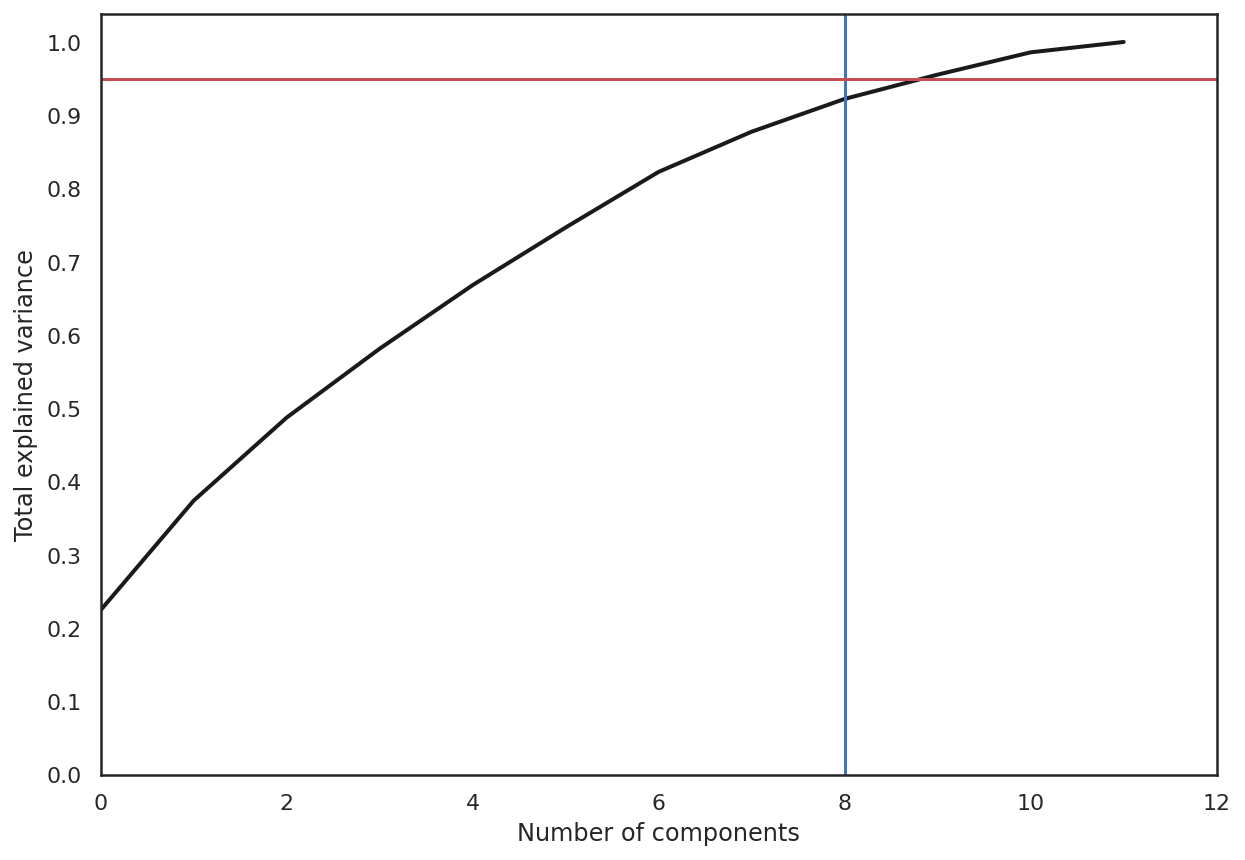

In [ ]:
# Apply pca to the scaled train set first

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

X_scaled = StandardScaler().fit_transform(X_train)

pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 12)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(8, c='b') # Tune this so that you obtain at least a 95% total variance explained
plt.axhline(0.95, c='r')
plt.show();

In [ ]:
# Fit your dataset to the optimal pca
pca1 = decomposition.PCA(n_components=8)
X_pca = pca1.fit_transform(X_scaled)

In [ ]:
#Install dependencies for building sklearn
!sudo apt-get install build-essential python-dev python-setuptools \
                     python-numpy python-scipy \
                      libatlas-dev libatlas3gf-base
!sudo pip install cython
!git clone "https://github.com/scikit-learn/scikit-learn.git"
!cd scikit-learn
!make

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package libatlas-dev is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  libatlas-base-dev

E: Package 'libatlas-dev' has no installation candidate
E: Unable to locate package libatlas3gf-base
fatal: destination path 'scikit-learn' already exists and is not an empty directory.
make: *** No targets specified and no makefile found.  Stop.


In [ ]:
# You may want to check the results of TSNE also
from sklearn.manifold import TSNE

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(X_scaled)

In [ ]:
from scipy.sparse import csr_matrix, hstack

X_train_last = csr_matrix(hstack([X_pca, X_names_sparse])) # Check with X_tsne + X_names_sparse also

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Initialize a stratified split for the validation process
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Decision Trees First
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params, cv=skf, n_jobs=-1, verbose=True)

tree_grid.fit(X_train_last, y_train)
tree_grid.best_estimator_, tree_grid.best_score_


Fitting 5 folds for each of 150 candidates, totalling 750 fits


(DecisionTreeClassifier(max_depth=3, max_features=15), 0.3411764705882353)

In [ ]:
# Random Forests second

parameters = {'max_features': [4, 7, 8, 10], 'min_samples_leaf': [1, 3, 5, 8], 'max_depth': [3, 5, 8]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv1 = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv1.fit(X_train_last, y_train)
gcv1.best_estimator_, gcv1.best_score_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


(RandomForestClassifier(max_depth=5, max_features=10, n_jobs=-1, oob_score=True,
                        random_state=42), 0.32679738562091504)

In [ ]:
# kNN third
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors': range(1, 10)}
knn = KNeighborsClassifier(n_jobs=-1)

knn_grid = GridSearchCV(knn, knn_params, cv=skf, n_jobs=-1, verbose=True)
knn_grid.fit(X_train_last, y_train)
knn_grid.best_params_, knn_grid.best_score_


PCA + Decision Trees seems to perform better 

In [ ]:
# Now build your test set;
# Generate a new dataframe for recommended tracks
# Set recommendation limit as half the Playlist Length per track, you may change this as you like
# Check documentation for  recommendations; https://beta.developer.spotify.com/documentation/web-api/reference/browse/get-recommendations/

rec_tracks = []
for i in playlist_df['id'].values.tolist():
    rec_tracks += sp.recommendations(seed_tracks=[i], limit=int(len(playlist_df)/2))['tracks'];

rec_track_ids = []
rec_track_names = []
for i in rec_tracks:
    rec_track_ids.append(i['id'])
    rec_track_names.append(i['name'])

rec_features = []
for i in range(0,len(rec_track_ids)):
    rec_audio_features = sp.audio_features(rec_track_ids[i])
    for track in rec_audio_features:
        rec_features.append(track)
        
rec_playlist_df = pd.DataFrame(rec_features, index = rec_track_ids)
rec_playlist_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
522GUu8a8oPPIDFoONcnEk,0.619,0.989,5,-2.141,0,0.1530,0.027200,0.00000,0.1980,0.628,128.001,audio_features,522GUu8a8oPPIDFoONcnEk,spotify:track:522GUu8a8oPPIDFoONcnEk,https://api.spotify.com/v1/tracks/522GUu8a8oPP...,https://api.spotify.com/v1/audio-analysis/522G...,203906,4
5IufAcPPObB0TAQtUaIVsZ,0.314,0.959,1,-5.715,1,0.0917,0.007950,0.00845,0.4080,0.489,199.940,audio_features,5IufAcPPObB0TAQtUaIVsZ,spotify:track:5IufAcPPObB0TAQtUaIVsZ,https://api.spotify.com/v1/tracks/5IufAcPPObB0...,https://api.spotify.com/v1/audio-analysis/5Iuf...,232492,4
3zxGKTgracAO1nvGKSM0UK,0.785,0.787,5,-6.782,0,0.0613,0.000406,0.08980,0.0923,0.830,134.993,audio_features,3zxGKTgracAO1nvGKSM0UK,spotify:track:3zxGKTgracAO1nvGKSM0UK,https://api.spotify.com/v1/tracks/3zxGKTgracAO...,https://api.spotify.com/v1/audio-analysis/3zxG...,88476,4
0jI7t8dSBRQU8EOlicWTmL,0.685,0.226,6,-16.423,1,0.3710,0.552000,0.00000,0.2350,0.361,116.815,audio_features,0jI7t8dSBRQU8EOlicWTmL,spotify:track:0jI7t8dSBRQU8EOlicWTmL,https://api.spotify.com/v1/tracks/0jI7t8dSBRQU...,https://api.spotify.com/v1/audio-analysis/0jI7...,180904,4
22NW3cdLyoQ1HdQbo8mHN8,0.877,0.458,2,-15.522,1,0.2770,0.677000,0.00000,0.2150,0.854,95.979,audio_features,22NW3cdLyoQ1HdQbo8mHN8,spotify:track:22NW3cdLyoQ1HdQbo8mHN8,https://api.spotify.com/v1/tracks/22NW3cdLyoQ1...,https://api.spotify.com/v1/audio-analysis/22NW...,144401,4


In [ ]:
X_test_names = v.transform(rec_track_names)

In [ ]:
rec_playlist_df=rec_playlist_df[["acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]]

In [ ]:
# Make predictions
tree_grid.best_estimator_.fit(X_train_last, y_train)
rec_playlist_df_scaled = StandardScaler().fit_transform(rec_playlist_df)
rec_playlist_df_pca = pca1.transform(rec_playlist_df_scaled)
X_test_last = csr_matrix(hstack([rec_playlist_df_pca, X_test_names]))
y_pred_class = tree_grid.best_estimator_.predict(X_test_last)

In [ ]:
rec_playlist_df['ratings']=y_pred_class
rec_playlist_df = rec_playlist_df.sort_values('ratings', ascending = False)
rec_playlist_df = rec_playlist_df.reset_index()

# Pick the top ranking tracks to add your new playlist 9, 10 will work
recs_to_add = rec_playlist_df[rec_playlist_df['ratings']>=9]['index'].values.tolist()


In [ ]:
# No ratings of 9 or 10 this case try adding 8's only
recs_to_add = rec_playlist_df[rec_playlist_df['ratings']==10]['index'].values.tolist()

In [ ]:
# Check what is about to happen :)
len(rec_tracks), rec_playlist_df.shape, len(recs_to_add)

(3852, (3852, 14), 3834)

In [ ]:
rec_array = np.reshape(recs_to_add, (54,71))

In [ ]:
# Create a new playlist for tracks to add - you may also add these tracks to your source playlist and proceed
playlist_recs = sp.user_playlist_create(username, 
                                        name='Recommended Songs for Playlist by AI #2 - {}'.format(sourcePlaylist['name']))


In [ ]:
n=1
while n<=100:
  print(3834/n)
  print(n)
  n=n+1

3834.0
1
1917.0
2
1278.0
3
958.5
4
766.8
5
639.0
6
547.7142857142857
7
479.25
8
426.0
9
383.4
10
348.54545454545456
11
319.5
12
294.9230769230769
13
273.85714285714283
14
255.6
15
239.625
16
225.52941176470588
17
213.0
18
201.78947368421052
19
191.7
20
182.57142857142858
21
174.27272727272728
22
166.69565217391303
23
159.75
24
153.36
25
147.46153846153845
26
142.0
27
136.92857142857142
28
132.20689655172413
29
127.8
30
123.6774193548387
31
119.8125
32
116.18181818181819
33
112.76470588235294
34
109.54285714285714
35
106.5
36
103.62162162162163
37
100.89473684210526
38
98.3076923076923
39
95.85
40
93.51219512195122
41
91.28571428571429
42
89.16279069767442
43
87.13636363636364
44
85.2
45
83.34782608695652
46
81.57446808510639
47
79.875
48
78.24489795918367
49
76.68
50
75.17647058823529
51
73.73076923076923
52
72.33962264150944
53
71.0
54
69.7090909090909
55
68.46428571428571
56
67.26315789473684
57
66.10344827586206
58
64.98305084745763
59
63.9
60
62.85245901639344
61
61.83870967741935


In [ ]:
# Add tracks to the new playlist
for i in rec_array:
    sp.user_playlist_add_tracks(username, playlist_recs['id'], i);